# Load a character in segments from the HanBitmap directory

In [1]:
import os

import numpy as np
import tensorflow as tf

from PIL import Image
from sklearn.model_selection import train_test_split

In [12]:
def loadXy(data_dir, han_char):
    dir_list = os.listdir(f"{data_dir}/{han_char}")
    dir_list.sort()
    fnames = []
    X_data = []
    y_data = []
    max_strokes = 0
    for f in dir_list:
        yX = open(f"{data_dir}/{han_char}/{f}", "rb").readlines()
        y_data.append(float(yX[1]))
        X_data.append(np.array([np.frombuffer(X, dtype=bool)[:-1].reshape(32, 32).astype(int) for X in yX[2:]]))
        if X_data[-1].shape[0] > max_strokes:
            max_strokes = X_data[-1].shape[0]
    for i in range(len(X_data)):
        while X_data[i].shape[0] < max_strokes:
            X_data[i] = np.append(X_data[i], np.zeros((1, 32, 32)), 0)
    X_data = np.array(X_data)
    y_data = np.array(y_data)
    return X_data, y_data

def loadXyCharSplits(data_dir, han_char, test_size = 0.2, random_state = 42):
    X_data, y_data = loadXy(data_dir, han_char)
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_data, test_size=test_size, random_state=random_state
    )
    X_train, X_test, y_train, y_test = (tf.convert_to_tensor(X_train, tf.float16),
                                        tf.convert_to_tensor(X_test, tf.float16),
                                        tf.convert_to_tensor(y_train, tf.float16),
                                        tf.convert_to_tensor(y_test, tf.float16),
                                       )
    return X_train, X_test, y_train, y_test
    
def displayBinary(arr):
    img = Image.fromarray(arr)
    return img

def displayBinaryStrokes(strokes):
    arr = strokes[0]
    for a in strokes[1:]:
        arr = np.logical_or(arr, a)
    img = Image.fromarray(arr)
    return img


In [4]:
X, y = loadXy("HanBitmap", "5E7E")


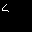

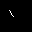

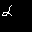

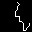

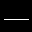

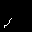

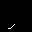

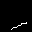

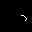

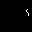

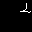

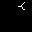

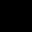

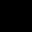

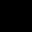

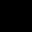

In [5]:
for s in X[11098]:
    display(displayBinary(s.astype(bool)))

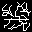

In [6]:
displayBinaryStrokes(X[11098].astype(bool))